Python version = 3.9.5
yfinance version = 0.1.69
Today = 2022-01-24T22:32:21

{
    "Symbol": "TSLA",
    "Letzter Preis": "943.90",
    "Preis gestern": "996.27",
    "Preis Change": "-52.37",
    "52-Wochen-Hoch": 1243.49,
    "52-Wochen-Tief": 539.49,
    "Unternehmenswert/EBITDA": 131.654,
    "Durchschnittliche Dividendenrendite 5y": null,
    "Eigenkapitalrendite": 0.15641,
    "Schulden/Equity (gesamt) (mrq)": 35.65
}
AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)


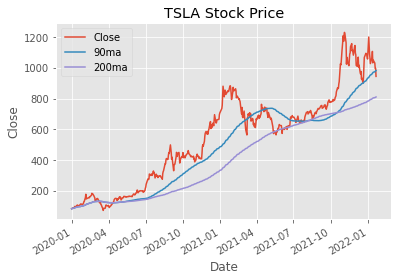


{
    "Symbol": "APC.DE",
    "Letzter Preis": "146.28",
    "Preis gestern": "149.54",
    "Preis Change": "-3.26",
    "52-Wochen-Hoch": 162.52,
    "52-Wochen-Tief": 97.82,
    "Unternehmenswert/EBITDA": 20.575,
    "Durchschnittliche Dividendenrendite 5y": 1.18,
    "Eigenkapitalrendite": 1.47443,
    "Schulden/Equity (gesamt) (mrq)": 216.392
}
AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)


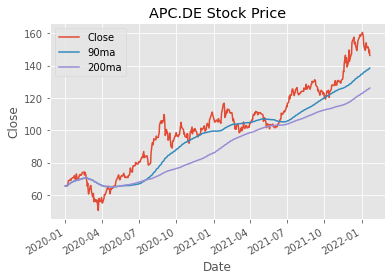


{
    "Symbol": "VOO",
    "Letzter Preis": "402.69",
    "Preis gestern": "410.76",
    "Preis Change": "-8.07",
    "52-Wochen-Hoch": 441.26,
    "52-Wochen-Tief": 338.57,
    "Unternehmenswert/EBITDA": null,
    "Durchschnittliche Dividendenrendite 5y": null,
    "Eigenkapitalrendite": null,
    "Schulden/Equity (gesamt) (mrq)": null
}
AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)


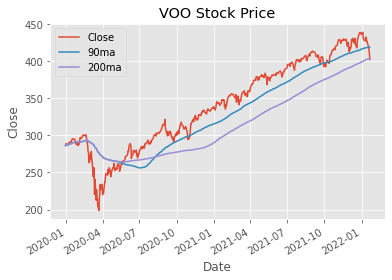

In [5]:
import platform
print('Python version = ' + platform.python_version())
import yfinance as yf
print('yfinance version = ' + yf.__version__)
import json
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import sys

tickersymbol = ['TSLA','APC.DE', 'VOO']
stock_data = {}
today = datetime.datetime.today().replace(microsecond=0).isoformat()
print('Today = ' + today)
print()

def fetch_data(tickersymbol):
    for symbol in tickersymbol:
        
        #Create Dict from tickerdata
        tickerdata = yf.Ticker(symbol) #Ticker-Object
        daten = tickerdata.info #Dictionary
        #print(json.dumps(daten, indent=4))
        
        #Create DF for time certain period 
        tickerDF = tickerdata.history(period='1d',start='2020-1-1', end=today[:10]) #w isoformat, first 10 chars are the date
        priceLast = tickerDF['Close'].iloc[-1] #last row
        priceYest = tickerDF['Close'].iloc[-2] #row before last
        priceChange = priceLast - priceYest
        
        #Eigene Statistiken
        tickerDF['90ma']=tickerDF['Close'].rolling(window=90, min_periods=0).mean()
        tickerDF['200ma']=tickerDF['Close'].rolling(window=200, min_periods=0).mean()
            
        try:
            data = {
                'Symbol': symbol,
                'Letzter Preis': str("%.2f" % priceLast),
                'Preis gestern': str("%.2f" % priceYest),
                'Preis Change': str("%.2f" % priceChange),
                '52-Wochen-Hoch': daten.get('fiftyTwoWeekHigh'),
                '52-Wochen-Tief': daten.get('fiftyTwoWeekLow'),
                'Unternehmenswert/EBITDA': daten.get('enterpriseToEbitda'),
                'Durchschnittliche Dividendenrendite 5y': daten.get('fiveYearAvgDividendYield'),
                'Eigenkapitalrendite': daten.get('returnOnEquity'),
                'Schulden/Equity (gesamt) (mrq)': daten.get('debtToEquity')
            }
            stock_data[symbol] = data
        except:
            print(sys.exc_info())
            continue
        
        print(json.dumps(stock_data[symbol], indent=4, ensure_ascii=False))
        
        #plots
        print(tickerDF['Close'].plot())
        print(tickerDF['90ma'].plot())
        print(tickerDF['200ma'].plot())
        plt.grid(True)    
        plt.xlabel('Date')
        plt.ylabel('Close')
        plt.legend()
        plt.title(symbol + ' Stock Price')
        plt.show()
        style.use('ggplot')
        
        print()
    
fetch_data(tickersymbol)
